**DATA CLEANING:**

1. Extract Year and Month from Depth_ID field
2. Drop reference columns
3. Check for NULL and DUPLICATES
4. Determine if NULLs should be filled with NA or mean
5. Visualize datapoint collection over the years

**Exploratory Data Analysis (EDA)**

1. Salinity over the years and seasonal
2. Correlation - heatmap
3. Plot high-correlation features

**Plot Location Data on World Map**

1. Import "folium"
2. Load CalCOFI data long/lat and dates
3. Plot location points on world map

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("../datasets/data-cleaning/bottle.csv")
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

In [6]:
data.isna().any()

Cst_Cnt                False
Btl_Cnt                False
Sta_ID                 False
Depth_ID               False
Depthm                 False
T_degC                  True
Salnty                  True
O2ml_L                  True
STheta                  True
O2Sat                   True
Oxy_µmol/Kg             True
BtlNum                  True
RecInd                 False
T_prec                  True
T_qual                  True
S_prec                  True
S_qual                  True
P_qual                  True
O_qual                  True
SThtaq                  True
O2Satq                  True
ChlorA                  True
Chlqua                  True
Phaeop                  True
Phaqua                  True
PO4uM                   True
PO4q                    True
SiO3uM                  True
SiO3qu                  True
NO2uM                   True
                       ...  
MeanAs                  True
MeanAp                  True
MeanAq                  True
IncTim        

### 1 - Extract Year and Month from Depth_ID field
* Depth_ID = [Century]-[YY][MM][ShipCode]-etc

In [20]:
data["Year"] = (data["Depth_ID"].str.split("-", expand=True)[0] + data["Depth_ID"].str.split("-", expand=True)[1]).map(lambda x: str(x)[:4])
data["Month"] = (data["Depth_ID"].str.split("-", expand=True)[1]).map(lambda x: x[2:4])

In [22]:
data[["Depth_ID", "Year", "Month"]].head(7)

,Depth_ID,Year,Month
0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,03
1,19-4903CR-HY-060-0930-05400560-0008A-3,1949,03
2,19-4903CR-HY-060-0930-05400560-0010A-7,1949,03
3,19-4903CR-HY-060-0930-05400560-0019A-3,1949,03
4,19-4903CR-HY-060-0930-05400560-0020A-7,1949,03
5,19-4903CR-HY-060-0930-05400560-0030A-7,1949,03
6,19-4903CR-HY-060-0930-05400560-0039A-3,1949,03


### 2 - Drop reference columns

In [24]:
data.drop(["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID"], axis = 1, inplace = True)

In [25]:
data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,...,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment,Year,Month
0,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949,03
1,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949,03
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949,03
3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949,03
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949,03


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 72 columns):
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq                 65823 non-null float64
O2Satq                 217797 non-null float64
ChlorA                 225272 non-null float64
Chlqua                 639166 non-null float64
Pha

### 3 - Check for NULLs and DUPLICATED

- drop DUPLICATED rows
- drop columns with missing values
- PLOTS: normalize, then fill with NULL and fill with MEAN

In [28]:
data.duplicated().sum() #count of duplicated values

2675

In [29]:
data.drop_duplicates(inplace = True)

In [30]:
data.duplicated().sum()

0

In [38]:
# drop columns with more than 70% data missing

max = 0.7

for column in data.columns:
    percentaje = data[column].isna().sum()/len(data)
    # print("Percentaje of missin values in {}: {}".format(column, percentaje))
    if percentaje > max:
        data.drop(column, axis = 1, inplace = True)
        
data.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES,Year,Month
0,0,10.50,33.440,NaN,25.649,NaN,NaN,3,1.0,2.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,1949,03
1,8,10.46,33.440,NaN,25.656,NaN,NaN,3,2.0,2.0,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,8,1949,03
2,10,10.46,33.437,NaN,25.654,NaN,NaN,7,2.0,3.0,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,10,1949,03
3,19,10.45,33.420,NaN,25.643,NaN,NaN,3,2.0,2.0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,19,1949,03
4,20,10.45,33.421,NaN,25.643,NaN,NaN,7,2.0,3.0,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,20,1949,03


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862188 entries, 0 to 864862
Data columns (total 42 columns):
Depthm         862188 non-null int64
T_degC         852871 non-null float64
Salnty         816905 non-null float64
O2ml_L         695906 non-null float64
STheta         811598 non-null float64
O2Sat          661119 non-null float64
Oxy_µmol/Kg    661113 non-null float64
RecInd         862188 non-null int64
T_prec         852871 non-null float64
S_prec         816905 non-null float64
P_qual         671090 non-null float64
Chlqua         636509 non-null float64
Phaqua         636513 non-null float64
PO4uM          413167 non-null float64
PO4q           449257 non-null float64
SiO3uM         353947 non-null float64
SiO3qu         508334 non-null float64
NO2uM          337431 non-null float64
NO2q           526943 non-null float64
NO3uM          337191 non-null float64
NO3q           527469 non-null float64
NH3q           805624 non-null float64
C14A1q         845930 non-null floa

In [41]:
data.duplicated().sum()

1766

In [42]:
data.isnull().sum()

Depthm              0
T_degC           9317
Salnty          45283
O2ml_L         166282
STheta          50590
O2Sat          201069
Oxy_µmol/Kg    201075
RecInd              0
T_prec           9317
S_prec          45283
P_qual         191098
Chlqua         225679
Phaqua         225675
PO4uM          449021
PO4q           412931
SiO3uM         508241
SiO3qu         353854
NO2uM          524757
NO2q           335245
NO3uM          524997
NO3q           334719
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP           9317
R_POTEMP        43953
R_SALINITY      45283
R_SIGMA         50756
R_SVA           50671
R_DYNHT         44686
R_O2           166282
R_O2Sat        195894
R_SIO3         508233
R_PO4          449013
R_NO3          524989
R_NO2          524749
R_PRES              0
Year                0
Month               0
dtype: int64

### 4 - Determine if NULLs should be filled with NA or mean
* PLOTS:  normalize, then fill with NULL and fill with MEAN
* Determine from plots if NULLs should be NaN or Mean
    * normalized plots should be smooth
    * use whichever plot matches the normalized plot the best
    * fill mean if the plot matches normalized data
    * fill na if mean plot does not match normalized

In [58]:
# Find columns with NULL values
colnull = data.isnull().sum() # count of null values
datanull = []

for column in data.columns:
    if data[column].isnull().any(): # Column has any NULL value
        datanull.append(column)
        
for col in datanull:
    count_null_values = data[col].isnull().sum()
    print(col, count_null_values)

T_degC 9317
Salnty 45283
O2ml_L 166282
STheta 50590
O2Sat 201069
Oxy_µmol/Kg 201075
T_prec 9317
S_prec 45283
P_qual 191098
Chlqua 225679
Phaqua 225675
PO4uM 449021
PO4q 412931
SiO3uM 508241
SiO3qu 353854
NO2uM 524757
NO2q 335245
NO3uM 524997
NO3q 334719
NH3q 56564
C14A1q 16258
C14A2q 16240
DarkAq 24423
MeanAq 24424
R_TEMP 9317
R_POTEMP 43953
R_SALINITY 45283
R_SIGMA 50756
R_SVA 50671
R_DYNHT 44686
R_O2 166282
R_O2Sat 195894
R_SIO3 508233
R_PO4 449013
R_NO3 524989
R_NO2 524749


ValueError: array must not contain infs or NaNs

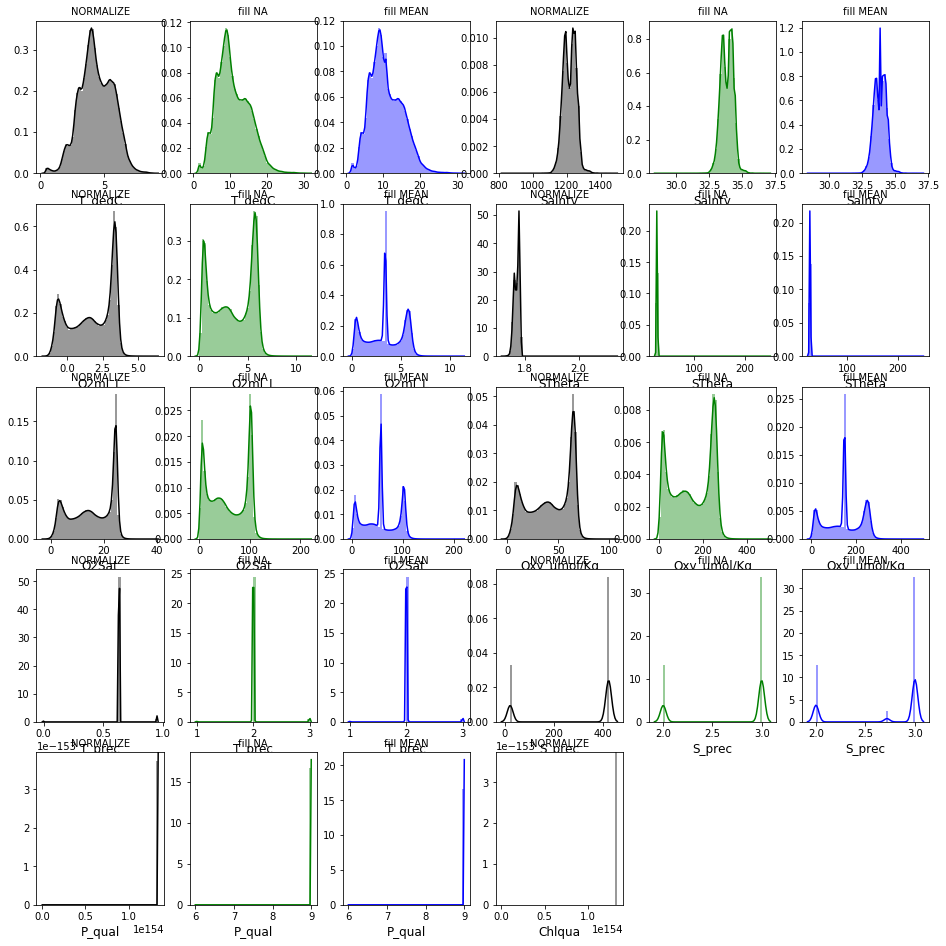

In [65]:
#  PLOTS:  normalize, then fill with NULL and fill with MEAN
#  fig.add_subplot([# of rows] by [# of columns] by [plot#])

cols_number = 6 # each attribute has 3 columns
rows_number = len(datanull)/2 # two attributes per row
plt_number = 1 # initialize plot number

figure = plt.figure(figsize=(16,60))

for col in datanull:
    
    # normalized
    figure.add_subplot(rows_number, cols_number, plt_number)
    plt.title("NORMALIZE", fontsize = 10)
    plt.xlabel(col, fontsize = 12)
    normPlot = stats.boxcox(data[data[col] > 0][col])[0] # normalize
    sns.distplot(normPlot, color = "black")
    plt_number += 1
    
    # fill NA
    figure.add_subplot(rows_number, cols_number, plt_number)
    plt.title("fill NA", fontsize = 10)
    plt.xlabel(col, fontsize = 12)
    fillNaPlot = data[col].dropna()
    sns.distplot(fillNaPlot, color = "green")
    plt_number += 1
    
    # fill MEAN
    figure.add_subplot(rows_number, cols_number, plt_number)
    plt.title("fill MEAN", fontsize = 10)
    plt.xlabel(col, fontsize = 12)
    fillMeanPlot = data[col].fillna(data[col].mean())
    sns.distplot(fillMeanPlot, color = "blue")
    plt_number += 1
    
plt.show()

#### Visually inspect the normalized, fill=na and fill=mean plots
* normalized plots should be smooth
* use whichever plot matches the normalized plot the best
* fill mean if the plot matches normalized data
* fill na if mean plot does not match normalized